# EDA of Data Science Salaries 2024

## About Dataset

##Context
In the rapidly evolving field of data science, understanding the trends and patterns in salaries is crucial for professionals and organizations alike. This dataset aims to shed light on the landscape of Data Science Salaries from 2020 to 2024. By analyzing salary data over this period, data enthusiasts, researchers, and industry professionals can gain valuable insights into salary trends, regional variations, and potential factors influencing compensation within the data science community.

## Content
The dataset encompasses a comprehensive collection of data science salary information, covering a span of five years from 2020 to 2024. The data includes various aspects related to salaries, providing a multifaceted view of compensation in the field.

## Dataset Structure
This dataset (data_science_salaries) covering from 2020 up to 2024 includes the following columns:
Column Name	Description
- job_title	The job title or role associated with the reported salary.
- experience_level	The level of experience of the individual.
- employment_type	Indicates whether the employment is full-time, part-time, etc.
- work_models	Describes different working models (remote, on-site, hybrid).
- work_year	The specific year in which the salary information was recorded.
- employee_residence	The residence location of the employee.
- salary	The reported salary in the original currency.
salary_currency	The currency in which the salary is denominated.
- salary_in_usd	The converted salary in US dollars.
company_location	The geographic location of the - employing organization.
- company_size	The size of the company, categorized by the number of employees.

### Objective
In the rapidly evolving field of data science, understanding the trends and patterns in salaries is crucial for professionals and organizations alike. This dataset aims to shed light on the landscape of Data Science Salaries from 2020 to 2024. By analyzing salary data over this period, data enthusiasts, researchers, and industry professionals can gain valuable insights into salary trends, regional variations, and potential factors influencing compensation within the data science community.

In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# 1: Data Cleaning

### Importing Dataset

In [229]:

df=pd.read_csv("/content/data_science_salaries-2024.csv")
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [230]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [231]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

Renaming Unnamed column 0 to ID

In [232]:
df = df.rename(columns={'Unnamed: 0': 'id'})
print('renaming done')

renaming done


### indentifying missing values

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


Observation: No Null values in the data \
Conclusion: no need to perform data cleaning

# Exploratory Data Analysis

In [234]:
df.describe()

,work_year,salary,salary_in_usd
count,6599.000000,6.599000e+03,6599.000000
mean,2022.818457,1.792833e+05,145560.558569
std,0.674809,5.263722e+05,70946.838070
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,9.600000e+04,95000.000000
50%,2023.000000,1.400000e+05,138666.000000
75%,2023.000000,1.875000e+05,185000.000000
max,2024.000000,3.040000e+07,750000.000000


ID is primary key, it would not contribute to model building.

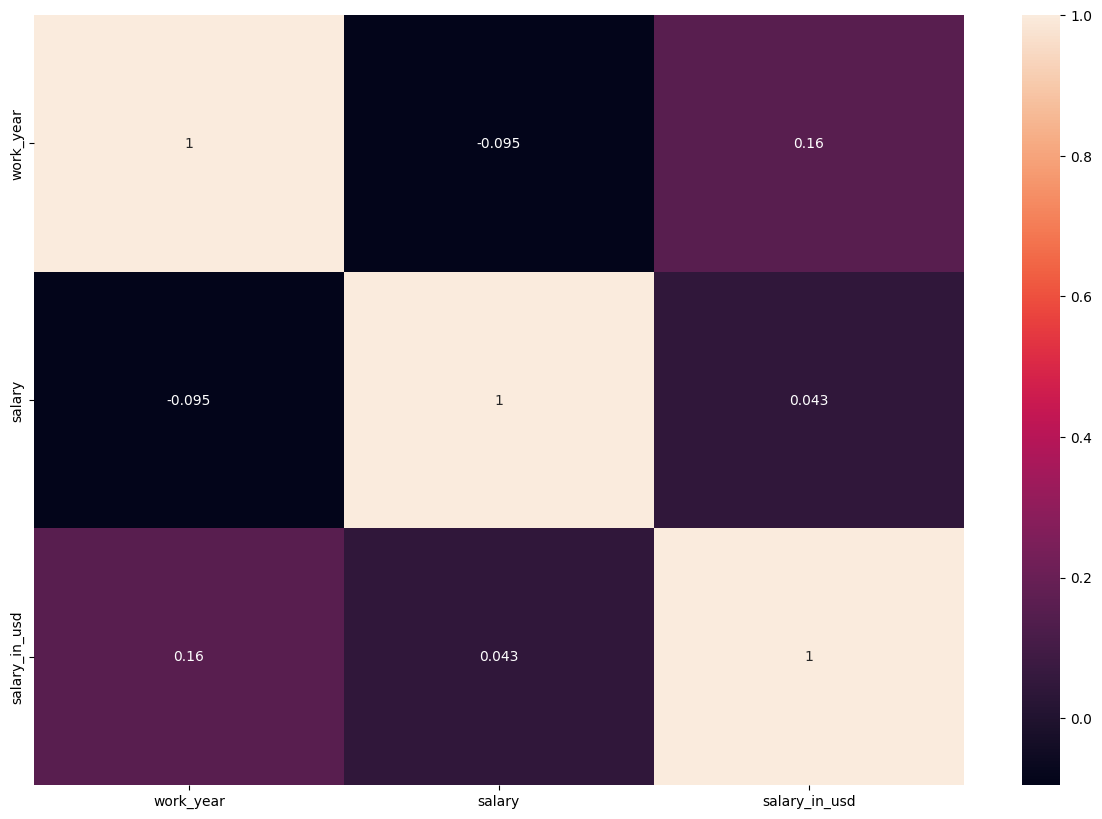

In [235]:
# Select int64 columns
int_cols = df.select_dtypes(include=['int64'])

# Plot correlation heatmap
plt.figure(figsize=(15,10))
sns.heatmap(int_cols.corr(), annot=True,)
plt.show()

In [236]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

We can clearly see, salary and salary_in_usd are not that related.
salary would not contribute to salary_in_usd prediction as salary+ salary_currency are equivalent of salary_in_usd.

Further columns left for investigating:
* 'job_title'
*  'experience_level'
*  'employment_type'
*  'work_models'
*  'work_year'
*  'employee_residence'
*  'salary', 'salary_currency',
*  'salary_in_usd'
*  'company_location'
*  'company_size'

## work_year

In [237]:
df.work_year.unique()

array([2024, 2023, 2022, 2021, 2020])

<ipython-input-238-8426e21de4fd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="work_year", y="salary_in_usd", palette='Set2',)


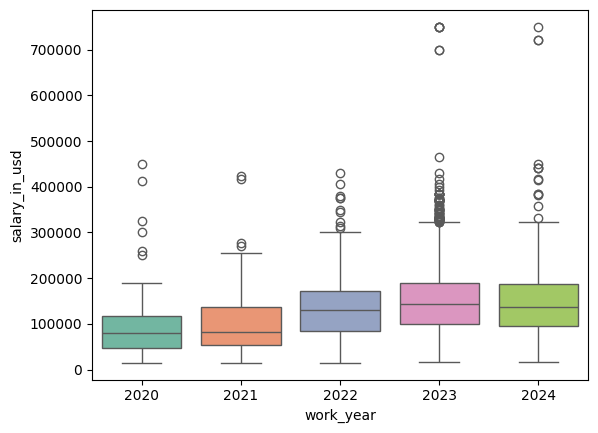

In [238]:
sns.boxplot(data=df, x="work_year", y="salary_in_usd", palette='Set2',)
plt.show()

box plot shows increase in salaries with progressing years.

## experience_level

In [239]:
df.experience_level.unique()

array(['Mid-level', 'Senior-level', 'Entry-level', 'Executive-level'],
      dtype=object)

<ipython-input-240-c87880181cc5>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  an = sns.barplot(x=a['experience_level'], y=a['salary_in_usd'], palette='Set2', ci=None)
<ipython-input-240-c87880181cc5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  an = sns.barplot(x=a['experience_level'], y=a['salary_in_usd'], palette='Set2', ci=None)


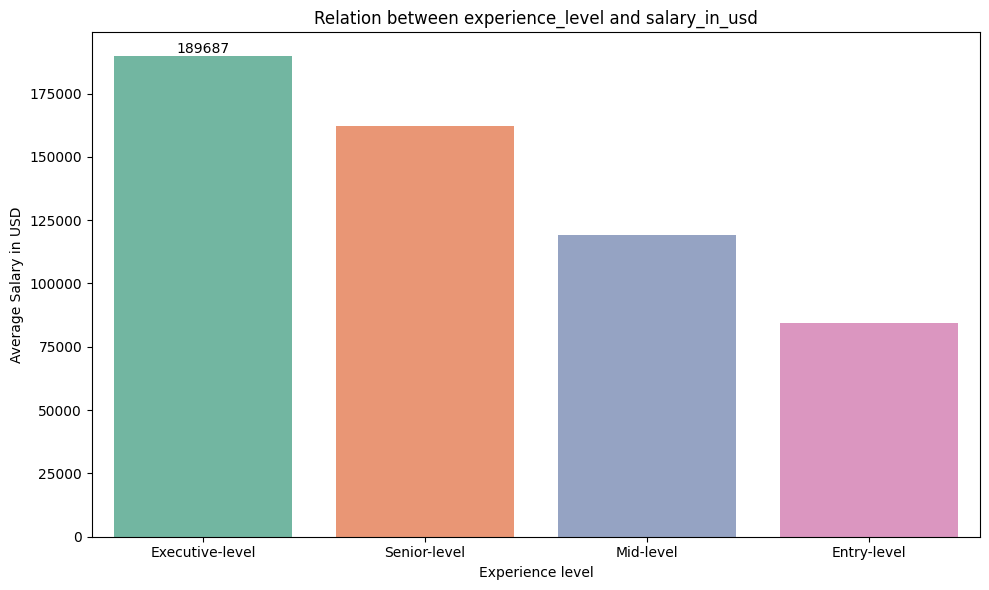

In [240]:
a=df.groupby('experience_level',as_index=False)["salary_in_usd"].mean().sort_values(by='salary_in_usd', ascending=False)
a['salary_in_usd'] = a['salary_in_usd'].round()
# ax = a.head(5)
plt.figure(figsize=(10,6), tight_layout=True)
an = sns.barplot(x=a['experience_level'], y=a['salary_in_usd'], palette='Set2', ci=None)
an.set(title='Relation between experience_level and salary_in_usd', xlabel='Experience level', ylabel='Average Salary in USD')
an.bar_label(an.containers[0])
plt.show()

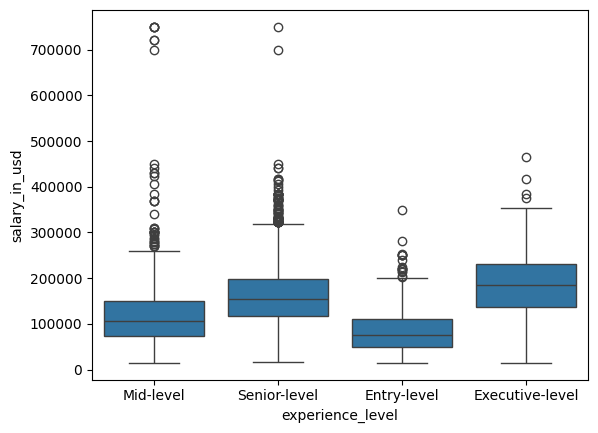

In [241]:
sns.boxplot(data=df, x="experience_level", y="salary_in_usd")
plt.show()

## employment_type

In [242]:
df.employment_type.unique()

array(['Full-time', 'Part-time', 'Contract', 'Freelance'], dtype=object)

<ipython-input-243-dda64842bd99>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  an = sns.barplot(x=a['employment_type'], y=a['salary_in_usd'], palette='Set2', ci=None)
<ipython-input-243-dda64842bd99>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  an = sns.barplot(x=a['employment_type'], y=a['salary_in_usd'], palette='Set2', ci=None)


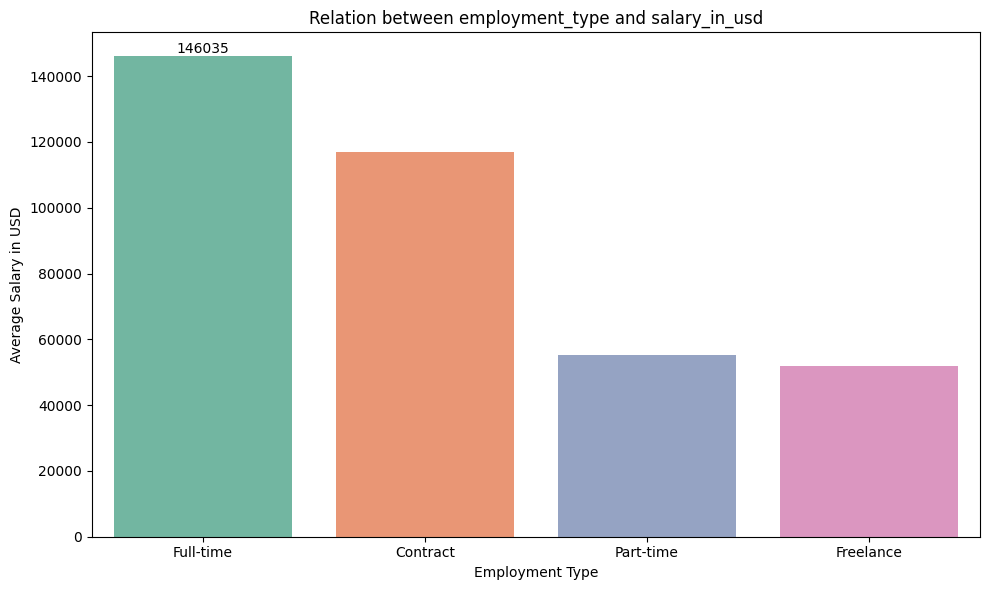

In [243]:
a=df.groupby('employment_type',as_index=False)["salary_in_usd"].mean().sort_values(by='salary_in_usd', ascending=False)
a['salary_in_usd'] = a['salary_in_usd'].round()
# ax = a.head(5)
plt.figure(figsize=(10,6), tight_layout=True)
an = sns.barplot(x=a['employment_type'], y=a['salary_in_usd'], palette='Set2', ci=None)
an.set(title='Relation between employment_type and salary_in_usd', xlabel='Employment Type', ylabel='Average Salary in USD')
an.bar_label(an.containers[0])
plt.show()

<ipython-input-244-e5158db94d86>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="salary_in_usd", y="employment_type",palette='Set2',)


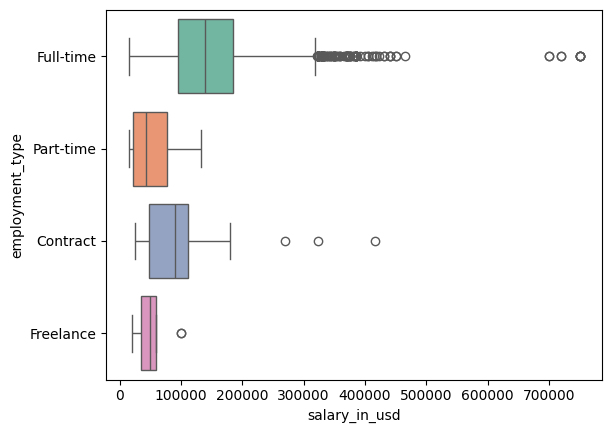

In [244]:
sns.boxplot(data=df, x="salary_in_usd", y="employment_type",palette='Set2',)
plt.show()

Box plot & bar graph show increasing relation between employment_type & salary in following order:\
FL<CT<PT<FT

## job_title

In [245]:
df.job_title.unique()

array(['Data Engineer', 'Data Scientist', 'BI Developer',
       'Research Analyst', 'Business Intelligence Developer',
       'Data Analyst', 'Director of Data Science', 'MLOps Engineer',
       'Machine Learning Scientist', 'Machine Learning Engineer',
       'Data Science Manager', 'Applied Scientist',
       'Business Intelligence Analyst', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Data Science',
       'Research Scientist', 'Research Engineer',
       'Managing Director Data Science', 'AI Engineer', 'Data Specialist',
       'Data Architect', 'Data Visualization Specialist', 'ETL Developer',
       'Data Science Practitioner', 'Computer Vision Engineer',
       'Data Lead', 'ML Engineer', 'Data Developer', 'Data Modeler',
       'Data Science Consultant', 'AI Architect',
       'Data Analytics Manager', 'Data Science Engineer',
       'Data Product Manager', 'Data Quality Analyst', 'Data Strategist',
       'Prompt Engineer', 'Data Science Lead',
       'Busi

In [246]:
df.job_title.nunique()

132

<ipython-input-247-e08c77429a8d>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  an = sns.barplot(x=ax['job_title'], y=a['salary_in_usd'], palette='Set2', ci=None)
<ipython-input-247-e08c77429a8d>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  an = sns.barplot(x=ax['job_title'], y=a['salary_in_usd'], palette='Set2', ci=None)


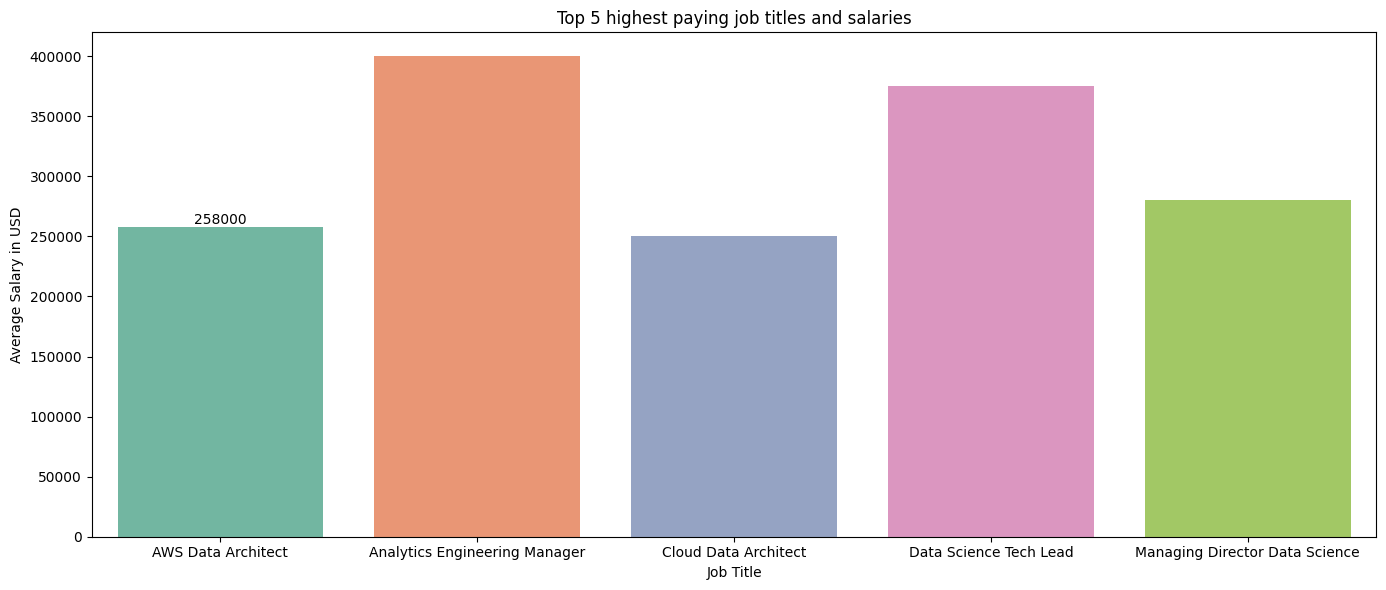

In [247]:
a=df.groupby('job_title',as_index=False)["salary_in_usd"].mean().sort_values(by='salary_in_usd', ascending=False)
a['salary_in_usd'] = a['salary_in_usd'].round()
ax = a.head(5)
plt.figure(figsize=(14,6), tight_layout=True)
an = sns.barplot(x=ax['job_title'], y=a['salary_in_usd'], palette='Set2', ci=None)
an.set(title='Top 5 highest paying job titles and salaries', xlabel='Job Title', ylabel='Average Salary in USD')
an.bar_label(an.containers[0])
plt.show()

<ipython-input-248-30437a852af9>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  an = sns.barplot(x=ax['job_title'], y=a['salary_in_usd'], palette='Set2', ci=None)
<ipython-input-248-30437a852af9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  an = sns.barplot(x=ax['job_title'], y=a['salary_in_usd'], palette='Set2', ci=None)


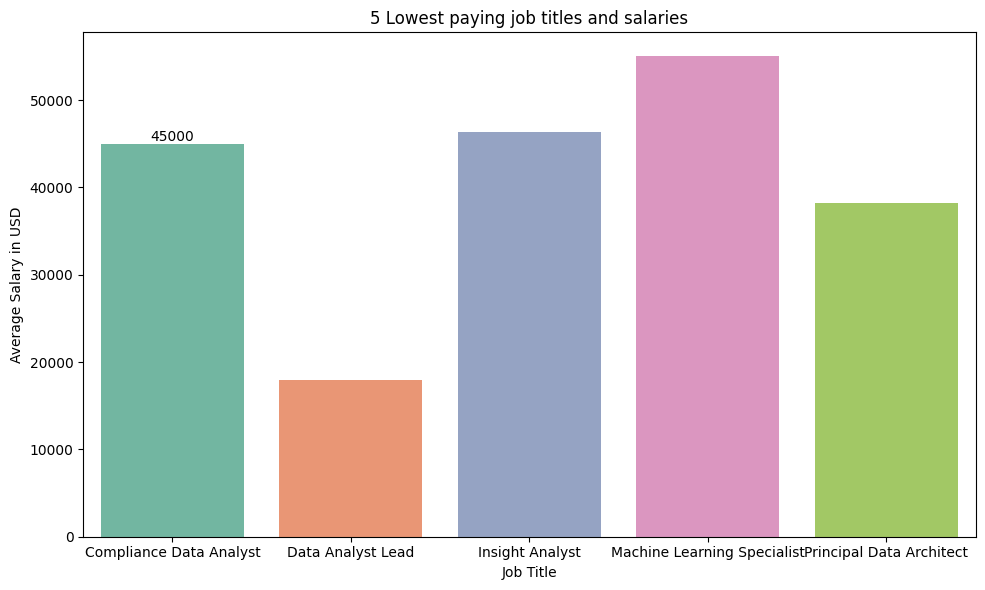

In [248]:
ax = a.tail(5)
plt.figure(figsize=(10,6), tight_layout=True)
an = sns.barplot(x=ax['job_title'], y=a['salary_in_usd'], palette='Set2', ci=None)
an.set(title='5 Lowest paying job titles and salaries', xlabel='Job Title', ylabel='Average Salary in USD')
an.bar_label(an.containers[0])
plt.show()

<ipython-input-249-cdaf206238a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="salary_in_usd", y="job_title", palette='Set2',)


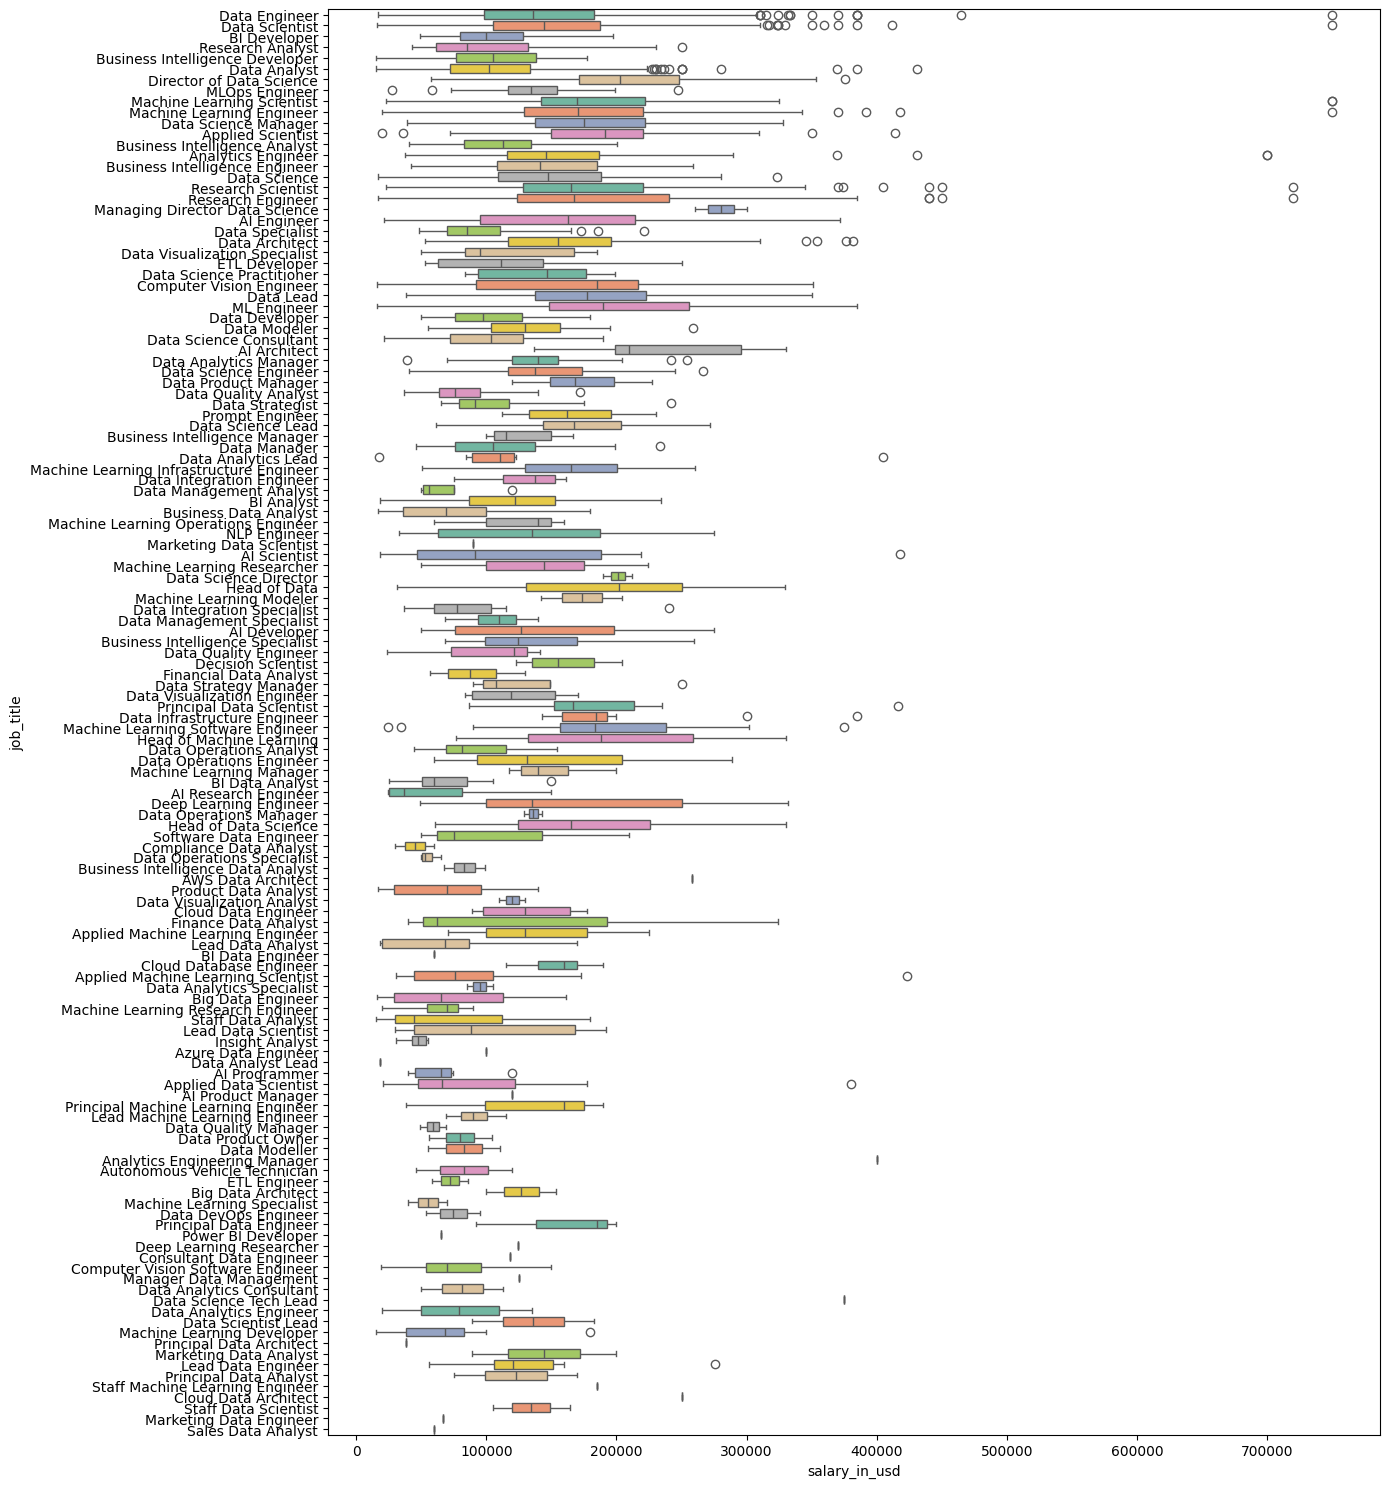

In [249]:
plt.figure(figsize=(14,15), tight_layout=True)
sns.boxplot(data=df, x="salary_in_usd", y="job_title", palette='Set2',)
plt.show()

**Observation:** boxplots show that internal variation in salaries for many job_titles is very high \
**Conclusion:** job_titles cannot be a crucial factor in deciding salary.

## employee_residence

In [250]:
df.employee_residence.unique()

array(['United States', 'Romania', 'Portugal', 'Lebanon', 'India',
       'Ireland', 'United Kingdom', 'Spain', 'Egypt', 'Germany', 'Canada',
       'Australia', 'Vietnam', 'Uganda', 'Italy', 'Thailand',
       'Philippines', 'Tunisia', 'Belgium', 'Turkey', 'Nigeria',
       'Uzbekistan', 'Argentina', 'France', 'Kuwait', 'Ukraine',
       'South Africa', 'Slovenia', 'Singapore', 'Sweden', 'Saudi Arabia',
       'Armenia', 'Russia', 'Georgia', 'Qatar', 'Peru', 'Poland',
       'New Zealand', 'Norway', 'Netherlands', 'Mexico', 'Latvia',
       'Pakistan', 'Lithuania', 'South Korea', 'Kenya', 'Moldova',
       'Israel', 'Hungary', 'Croatia', 'Hong Kong', 'Greece', 'Ghana',
       'Finland', 'Estonia', 'Cyprus', 'Ecuador', 'Austria', 'Colombia',
       'Switzerland', 'Central African Republic', 'Czech Republic',
       'Brazil', 'Bosnia and Herzegovina', 'Andorra', 'China',
       'Costa Rica', 'Chile', 'Bolivia', 'Malaysia',
       'United Arab Emirates', 'Puerto Rico', 'Japan', 'Iran',
 

In [251]:
df.employee_residence.nunique()

87

<ipython-input-252-69c37c59f64c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  an = sns.barplot(x=ax['employee_residence'], y=a['salary_in_usd'], palette='Set2', ci=None)
<ipython-input-252-69c37c59f64c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  an = sns.barplot(x=ax['employee_residence'], y=a['salary_in_usd'], palette='Set2', ci=None)


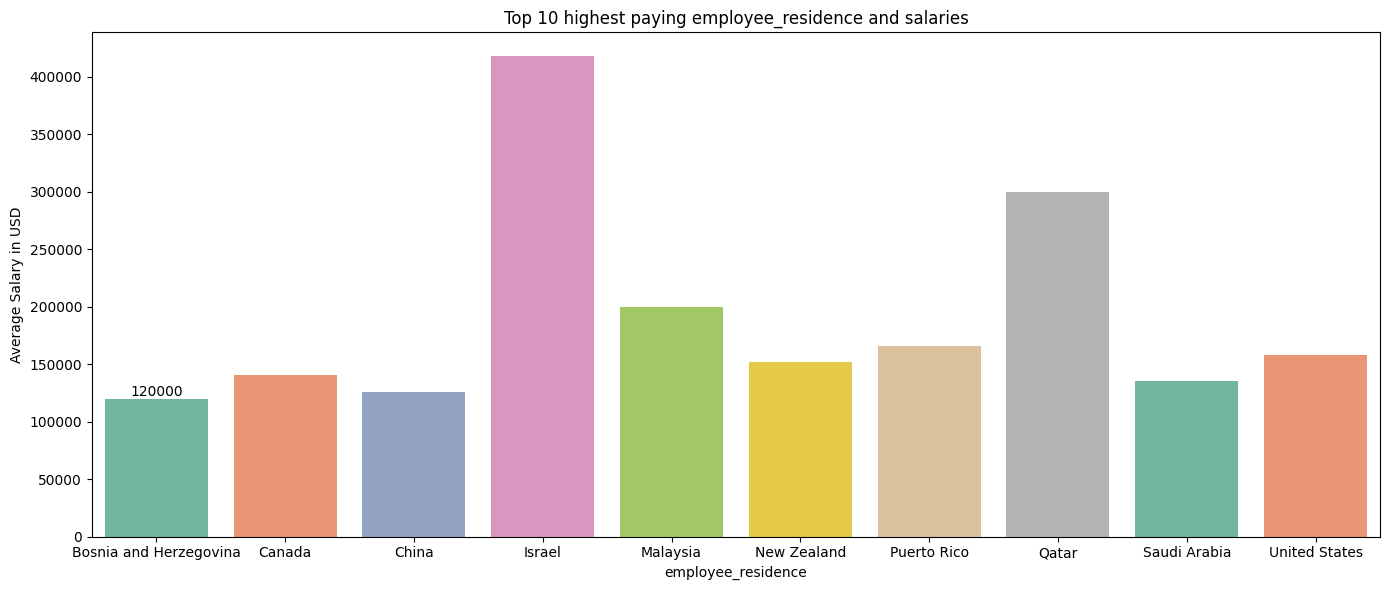

In [252]:
a=df.groupby('employee_residence',as_index=False)["salary_in_usd"].mean().sort_values(by='salary_in_usd', ascending=False)
a['salary_in_usd'] = a['salary_in_usd'].round()
ax = a.head(10)
plt.figure(figsize=(14,6), tight_layout=True)
an = sns.barplot(x=ax['employee_residence'], y=a['salary_in_usd'], palette='Set2', ci=None)
an.set(title='Top 10 highest paying employee_residence and salaries', xlabel='employee_residence', ylabel='Average Salary in USD')
an.bar_label(an.containers[0])
plt.show()

employee_residence data appears to be too vague to be considered as a feature.

In [253]:
df.columns

Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

## work_models

In [254]:
df.work_models.unique()

array(['Remote', 'On-site', 'Hybrid'], dtype=object)

In [255]:
df.work_models.nunique()

3

<ipython-input-256-8871d4660d12>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="work_models", y="salary_in_usd",palette='Set2')


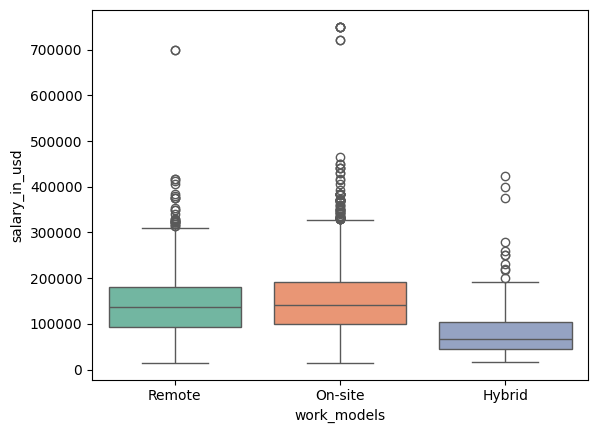

In [256]:
sns.boxplot(data=df, x="work_models", y="salary_in_usd",palette='Set2')
plt.show()

## company_location

In [257]:
df.company_location.unique()

array(['United States', 'Romania', 'Portugal', 'Lebanon', 'India',
       'Ireland', 'United Kingdom', 'Spain', 'Egypt', 'Germany', 'Canada',
       'Australia', 'Vietnam', 'Ukraine', 'Turkey', 'Thailand',
       'South Africa', 'Slovenia', 'Singapore', 'Sweden', 'Saudi Arabia',
       'Russia', 'Qatar', 'Poland', 'Philippines', 'New Zealand',
       'Norway', 'Netherlands', 'Nigeria', 'Mexico', 'Latvia',
       'Luxembourg', 'Lithuania', 'South Korea', 'Kenya', 'Japan',
       'Italy', 'Israel', 'Hungary', 'Croatia', 'Hong Kong', 'Greece',
       'Gibraltar', 'Ghana', 'France', 'Finland', 'Estonia', 'Ecuador',
       'Denmark', 'Czech Republic', 'Colombia', 'Switzerland',
       'Central African Republic', 'Brazil', 'Bosnia and Herzegovina',
       'Armenia', 'Argentina', 'Andorra', 'United Arab Emirates',
       'Puerto Rico', 'Pakistan', 'Malaysia', 'Iran', 'Indonesia',
       'Algeria', 'Belgium', 'Austria', 'Malta', 'Moldova', 'Iraq',
       'China', 'Chile', 'Bahamas', 'Mauritius

In [258]:
df.company_location.nunique()

75

<ipython-input-259-3f82fe5677ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="company_location", y="salary_in_usd",palette='Set2')


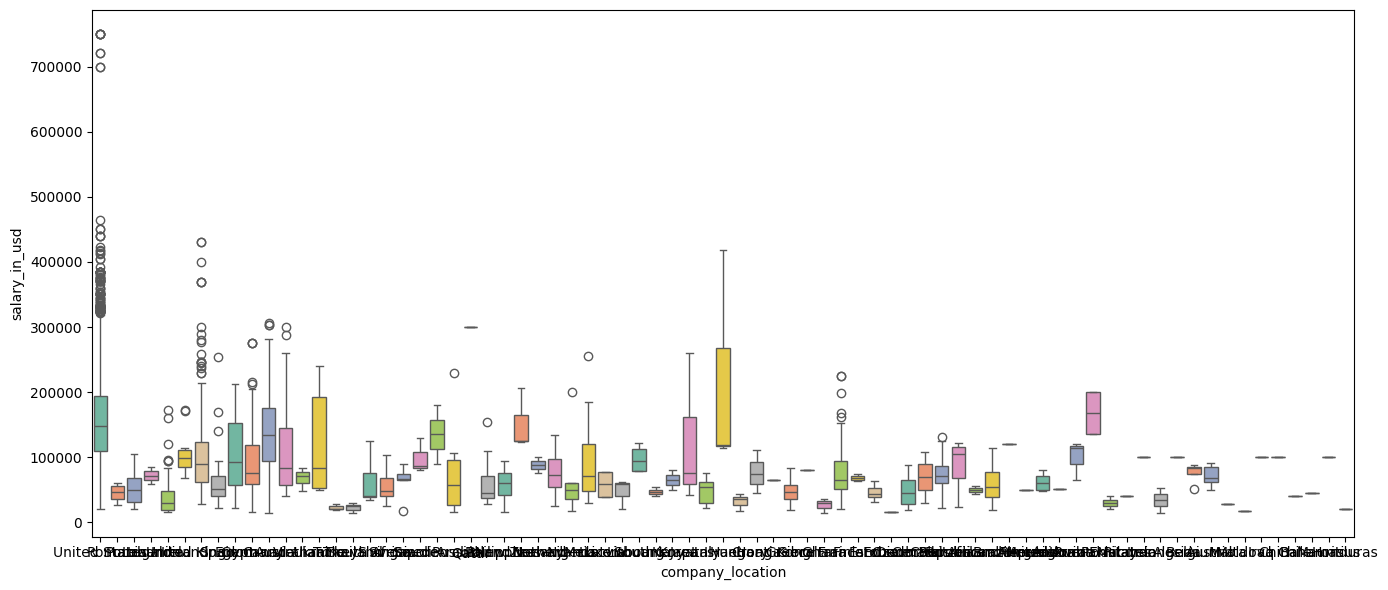

In [259]:
plt.figure(figsize=(14,6), tight_layout=True)
sns.boxplot(data=df, x="company_location", y="salary_in_usd",palette='Set2')
plt.show()

Company location data appears to be very vague to be considered as a feature.

## company_size

In [260]:
df.company_size.unique()

array(['Medium', 'Large', 'Small'], dtype=object)

<ipython-input-261-485422d8c0a1>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  an = sns.barplot(x=a['company_size'], y=a['salary_in_usd'], palette='Set2', ci=None)
<ipython-input-261-485422d8c0a1>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  an = sns.barplot(x=a['company_size'], y=a['salary_in_usd'], palette='Set2', ci=None)


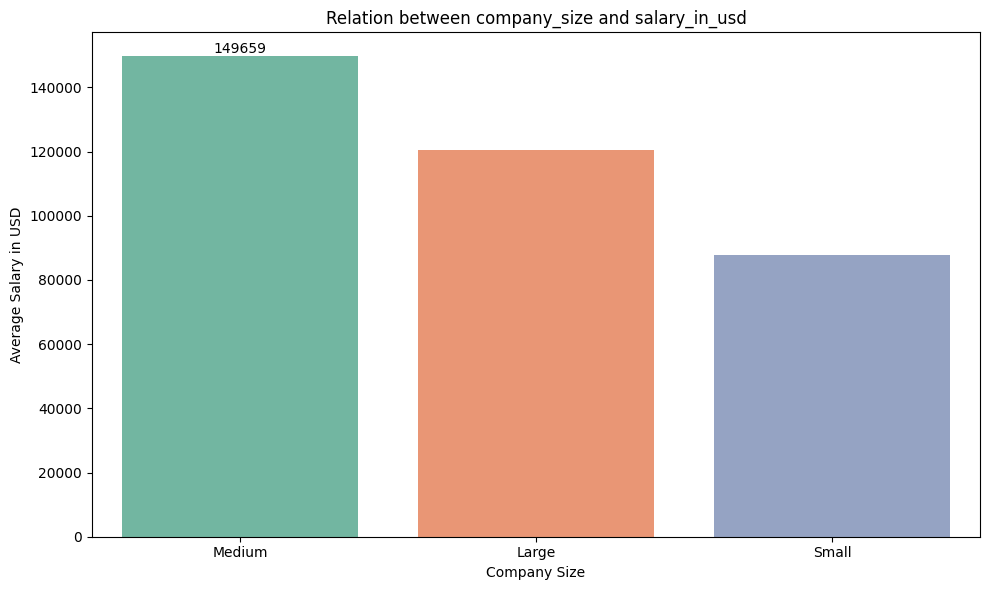

In [261]:
a=df.groupby('company_size',as_index=False)["salary_in_usd"].mean().sort_values(by='salary_in_usd', ascending=False)
a['salary_in_usd'] = a['salary_in_usd'].round()
# ax = a.head(5)
plt.figure(figsize=(10,6), tight_layout=True)
an = sns.barplot(x=a['company_size'], y=a['salary_in_usd'], palette='Set2', ci=None)
an.set(title='Relation between company_size and salary_in_usd', xlabel='Company Size', ylabel='Average Salary in USD')
an.bar_label(an.containers[0])
plt.show()

<ipython-input-262-2c794e5d021d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="salary_in_usd", y="company_size",palette='Set2')


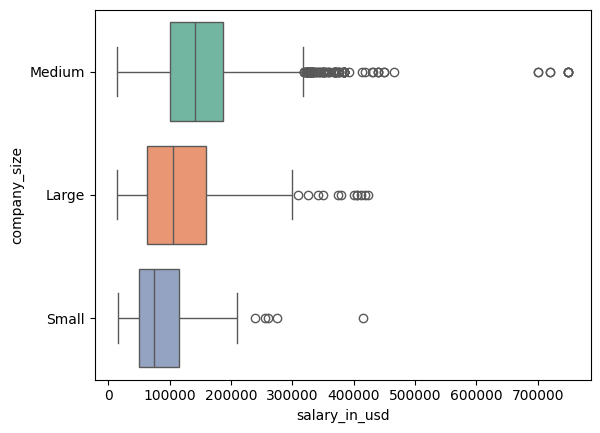

In [262]:
sns.boxplot(data=df, x="salary_in_usd", y="company_size",palette='Set2')
plt.show()

We can see a distinction between salaries for different company_sizes.
salaries increase as we go from: \
S<M<L

###  Outliers Removal


<ipython-input-263-32156ba30984>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['salary_in_usd'],palette='Set2')


<Axes: ylabel='salary_in_usd'>

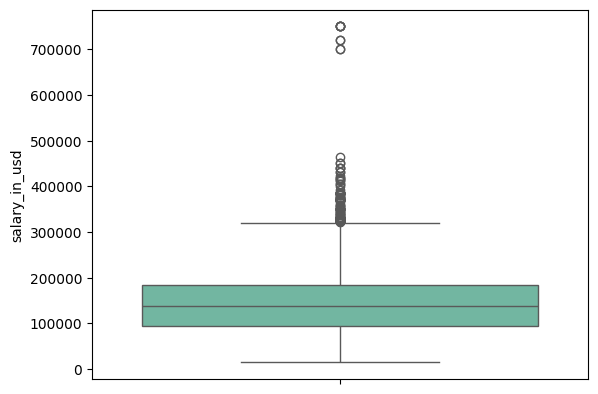

In [263]:
sns.boxplot(df['salary_in_usd'],palette='Set2')

Actual outlier value appears to be somewhere around greater than 600000 USD.
Thus for more accurate results we can remove them .

In [264]:
# removing outliers by finding IQR
Q1 = np.percentile(df['salary_in_usd'], 25,
                   interpolation = 'midpoint')

Q3 = np.percentile(df['salary_in_usd'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

print("Old Shape: ", df.shape)

# Upper bound
upper = np.where(df['salary_in_usd'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['salary_in_usd'] <= (Q1-1.5*IQR))

''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
print("New Shape: ", df.shape)

Old Shape:  (6599, 11)
New Shape:  (6492, 11)


<ipython-input-265-32156ba30984>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df['salary_in_usd'],palette='Set2')


<Axes: ylabel='salary_in_usd'>

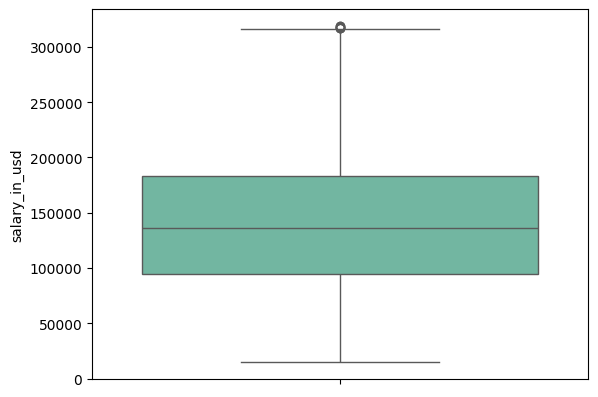

In [265]:
sns.boxplot(df['salary_in_usd'],palette='Set2')

We can see all the outliers have been removed.

# Feature Selection
After careful observation, following are the features are marked important in deciding salary amount:
* work_year
* experience level
* employment type
* company size

In [266]:
target = "salary_in_usd"
features = ["work_year","experience_level","employment_type","company_size",'work_models']
features

['work_year',
 'experience_level',
 'employment_type',
 'company_size',
 'work_models']

# Regression Model Building

##  Feature Engineering

In [267]:
df.experience_level .unique()

array(['Mid-level', 'Senior-level', 'Entry-level', 'Executive-level'],
      dtype=object)

In [268]:
# experience_level
sorted_experience_level = ['Entry-level','Mid-level', 'Senior-level', 'Executive-level']
for i in sorted_experience_level:
    df.experience_level[df.experience_level == i] = sorted_experience_level.index(i)+1
# employment_type
sorted_employment_type = ['Part-time','Freelance','Full-time', 'Contract']
for i in sorted_employment_type:
    df.employment_type[df.employment_type == i] = sorted_employment_type.index(i)+1
# company_size
sorted_company_size = ['Large', 'Medium', 'Small']
for i in df.company_size.unique():
    df.company_size[df.company_size == i] = sorted_company_size.index(i)+1

# work_models['Remote', 'On-site', 'Hybrid']
sorted_work_models = ['Remote', 'On-site', 'Hybrid']
for i in df.work_models.unique():
    df.work_models[df.work_models == i] = sorted_work_models.index(i)+1

selected_columns = features
# selected_columns.append(target)
df[selected_columns][df[features].employment_type !=1]

<ipython-input-268-2fa5e5320b79>:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.experience_level[df.experience_level == i] = sorted_experience_level.index(i)+1
<ipython-input-268-2fa5e5320b79>:4: SettingWithCopyWarning: 
A value is tryi

,work_year,experience_level,employment_type,company_size,work_models
0,2024,2,3,2,1
1,2024,2,3,2,1
2,2024,3,3,2,1
3,2024,3,3,2,1
4,2024,2,3,2,2
...,...,...,...,...,...
6594,2020,1,4,1,3
6595,2020,4,3,2,2
6596,2020,3,3,1,3
6597,2020,2,3,1,3


In [269]:
features

['work_year',
 'experience_level',
 'employment_type',
 'company_size',
 'work_models']

## Data  normalization

In [270]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Select the columns to normalize
features_to_normalize = df[features]

# Fit and transform the data
normalized_features = scaler.fit_transform(features_to_normalize)

# Replace the original columns with the normalized data
df[features] = normalized_features

# Train Test Split

In [271]:
df.columns


Index(['job_title', 'experience_level', 'employment_type', 'work_models',
       'work_year', 'employee_residence', 'salary', 'salary_currency',
       'salary_in_usd', 'company_location', 'company_size'],
      dtype='object')

# Model Building

In [272]:

# Define features and target variable
features = ['work_year', 'experience_level', 'employment_type', 'company_size', 'work_models']
target = 'salary_in_usd'

# Create X and y
X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', metrics.r2_score(y_test, y_pred))

# You can also print the coefficients and intercept of the model
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Absolute Error: 45395.22347757424
Mean Squared Error: 3143543526.4861717
Root Mean Squared Error: 56067.31245999019
R-squared: 0.1900266637338145
Coefficients: [ 43189.06830156 109946.00735368  62038.91284978   1982.5909094
   1997.82366817]
Intercept: 9363.0746929679


In [273]:

# Calculate and print the model accuracy (R-squared)
r_squared = metrics.r2_score(y_test, y_pred)
print(f"Model Accuracy (R-squared): {r_squared}")

Model Accuracy (R-squared): 0.1900266637338145


##implimetinting   Decision Tree, Random Forest and SVR Regression models

In [274]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Decision Tree Regression
dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train)
dt_train_pred = dt_regressor.predict(X_train)
dt_r2_score = dt_regressor.score(X_train, y_train)
print("Decision Tree Training accuracy score:", dt_r2_score * 100, '%')

# Random Forest Regression
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train)
rf_train_pred = rf_regressor.predict(X_train)
rf_r2_score = rf_regressor.score(X_train, y_train)
print("Random Forest Training accuracy score:", rf_r2_score * 100, '%')

# Support Vector Regression
svr_regressor = SVR()
svr_regressor.fit(X_train, y_train)
svr_train_pred = svr_regressor.predict(X_train)
svr_r2_score = svr_regressor.score(X_train, y_train)
print("Support Vector Regression Training accuracy score:", svr_r2_score * 100, '%')

Decision Tree Training accuracy score: 24.703852674280235 %
Random Forest Training accuracy score: 24.513467839859302 %
Support Vector Regression Training accuracy score: -0.23631382344728724 %


### Random Forest yielded the highest accuracy and thus is the best model for predicting data science salaries in this particular dataset

### Model Saving and Loading

In [275]:
# Save model
import joblib
import tensorflow as tf
# tf.saved_model.save(linReg, 'model')
joblib.dump (model, 'model_salaries.joblib')

['model_salaries.joblib']

## Summary

This Python code analyzes a dataset of Data Science Salaries from 2020 to 2024 to identify factors influencing salary trends.

**Key Steps:**

1. **Data Exploration & Cleaning:** The code imports the dataset, renames columns, checks for missing values, and analyzes the correlation between variables.
2. **Exploratory Data Analysis (EDA):** It examines the relationship between salary and various features like work year, experience level, employment type, job title, company location, and company size using visualizations like box plots and bar charts.
3. **Outlier Removal:** Outliers in the salary data are identified and removed using the Interquartile Range (IQR) method to improve model accuracy.
4. **Feature Selection:** Features found to be most influential on salary (work year, experience level, employment type, company size) are selected for model building.
5. **Feature Engineering:** Categorical features like experience level and employment type are converted into numerical values for model input.
6. **Data Normalization:** Features are normalized using MinMaxScaler to improve model performance.
7. **Regression Model Building:**  Linear Regression, Decision Tree Regression, Random Forest Regression, and Support Vector Regression models are built to predict salary.
8. **Model Evaluation:** Model performance is evaluated using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.
9. **Model Selection:** Random Forest is identified as the best-performing model based on its accuracy.
10. **Model Saving:** The trained model is saved using joblib for future use.

**In essence, the code aims to build a predictive model for data science salaries based on various factors like experience, company size, and employment type.**


## Future Work:

- **Expand Feature Engineering:** Explore creating new features that might better capture the nuances of salary determination, such as combining experience level and job title, or incorporating geographical location data for more precise analysis.
- **Hyperparameter Tuning:**  Fine-tune the hyperparameters of the selected Random Forest model to further improve its prediction accuracy.
- **Advanced Model Exploration:**  Investigate other machine learning models beyond Random Forest, such as gradient boosting or neural networks, to see if they can offer even better predictive power.
- **Deployment and User Interface:** Consider developing a user interface or web application that allows users to input their details and get an estimated salary prediction based on the trained model.